Simple minded data anlysis of COVID19 data. Inspired by a Mathematica Notebook of Thomas Voigtmann

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn
from IPython.display import set_matplotlib_formats

seaborn.set()
set_matplotlib_formats("pdf", "png")

In [2]:
import pandas

In [3]:
data = pandas.read_csv(
    "https://covid.ourworldindata.org/data/owid-covid-data.csv",
    parse_dates=True,
    index_col=["location", "date"],
)
data.fillna("")

iso_code  total_cases  new_cases  total_deaths  \
location      date                                                        
Aruba         2020-03-13      ABW            2          2             0   
              2020-03-20      ABW            4          2             0   
              2020-03-24      ABW           12          8             0   
              2020-03-25      ABW           17          5             0   
              2020-03-26      ABW           19          2             0   
...                           ...          ...        ...           ...   
International 2020-02-28                   705          0             4   
              2020-02-29                   705          0             6   
              2020-03-01                   705          0             6   
              2020-03-02                   705          0             6   
              2020-03-10                   696         -9             7   

                          new_deaths total_cases_per_million  \
location      date                                             
Aruba         2020-03-13           0                  18.733   
              2020-03-20           0                  37.465   
              2020-03-24           0                 112.395   
              2020-03-25           0                 159.227   
              2020-03-26           0                 177.959   
...                              ...                     ...   
International 2020-02-28           0                           
              2020-02-29           2                           
              2020-03-01           0                           
              2020-03-02           0                           
              2020-03-10           1                           

                         new_cases_per_million total_deaths_per_million  \
location      date                                                        
Aruba         2020-03-13                18.733                        0   
              2020-03-20                18.733                        0   
              2020-03-24                 74.93                        0   
              2020-03-25                46.831                        0   
              2020-03-26                18.733                        0   
...                                        ...                      ...   
International 2020-02-28                                                  
              2020-02-29                                                  
              2020-03-01                                                  
              2020-03-02                                                  
              2020-03-10                                                  

                         new_deaths_per_million total_tests  ...  \
location      date                                           ...   
Aruba         2020-03-13                      0              ...   
              2020-03-20                      0              ...   
              2020-03-24                      0              ...   
              2020-03-25                      0              ...   
              2020-03-26                      0              ...   
...                                         ...         ...  ...   
International 2020-02-28                                     ...   
              2020-02-29                                     ...   
              2020-03-01                                     ...   
              2020-03-02                                     ...   
              2020-03-10                                     ...   

                         aged_65_older aged_70_older gdp_per_capita  \
location      date                                                    
Aruba         2020-03-13        13.085         7.452        35973.8   
              2020-03-20        13.085         7.452        35973.8   
              2020-03-24        13.085         7.452        35973.8   


In [4]:
newcases = data['new_cases'].unstack(level='location')
newcases.fillna("")

location,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0,,0,,,,,,0,,...,,,,,0,,27.0,,,
2020-01-01,0,,0,,,,,,0,,...,,,,,0,,0.0,,,
2020-01-02,0,,0,,,,,,0,,...,,,,,0,,0.0,,,
2020-01-03,0,,0,,,,,,0,,...,,,,,0,,17.0,,,
2020-01-04,0,,0,,,,,,0,,...,,,,,0,,0.0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,259,4,186,2,0,0,0,316,180,0,...,2,65,0,17,0,0,85951.0,3,5,0
2020-05-15,113,18,189,1,3,0,0,255,142,0,...,5,33,0,15,24,0,96665.0,17,208,0
2020-05-16,1063,18,187,0,0,0,0,345,184,0,...,8,46,0,4,1,0,98034.0,19,14,5


Raw data for a few European countries

Text(0, 0.5, 'daily new reports')

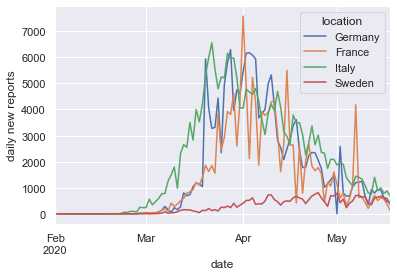

In [5]:
newcases[["Germany", "France", "Italy", "Sweden"]].plot(
    xlim=(
        pandas.to_datetime("1 Feb 2020"),
        pandas.to_datetime("today"),
    )
).set_ylabel("daily new reports")

Apply a 7 day moving average to smooth the curves

Text(0, 0.5, 'daily new reports (7-day rolling mean)')

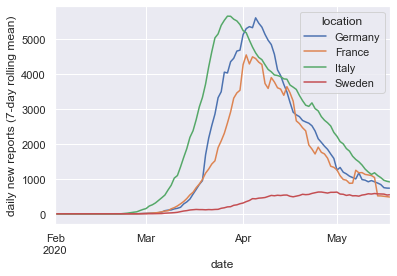

In [6]:
c = newcases.rolling(window=7).mean()
c[["Germany", "France", "Italy", "Sweden"]].plot(
    xlim=(
        pandas.to_datetime("1 Feb 2020"),
        pandas.to_datetime("today"),
    )
).set_ylabel("daily new reports (7-day rolling mean)")

Confirmed cases per population

In [7]:
data['total_cases_per_million'].unstack(level='location')

location,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,0.000,NaN,0.003,NaN,NaN,NaN
2020-01-01,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,0.000,NaN,0.003,NaN,NaN,NaN
2020-01-02,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,0.000,NaN,0.003,NaN,NaN,NaN
2020-01-03,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,0.000,NaN,0.006,NaN,NaN,NaN
2020-01-04,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,0.000,NaN,0.006,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,134.247,305.789,142.596,9836.278,1.369,199.973,255.29,151.917,1254.710,945.994,...,206.982,78.042,14833.127,15.473,2.959,10.045,552.888,2.347,24.260,2.489
2020-05-15,137.149,312.044,146.906,9849.220,1.460,199.973,255.29,157.559,1302.631,945.994,...,208.422,79.028,14833.127,16.001,3.205,10.045,565.289,2.917,35.574,2.489
2020-05-16,164.456,318.299,151.171,9849.220,1.460,199.973,255.29,165.192,1364.725,945.994,...,210.725,80.402,14833.127,16.142,3.216,10.045,577.866,3.554,36.336,2.826


Text(0, 0.5, 'confirmed cases per million')

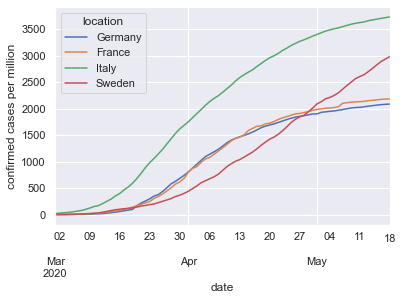

In [8]:
ax = (
    data["total_cases_per_million"]
    .unstack(level="location")[
        ["Germany", "France", "Italy", "Sweden"]
    ]
    .plot()
)
ax.set_xlim(pandas.to_datetime(("1 March 2020", "today")))
ax.set_ylabel("confirmed cases per million")

Text(0, 0.5, 'confirmed cases per million')

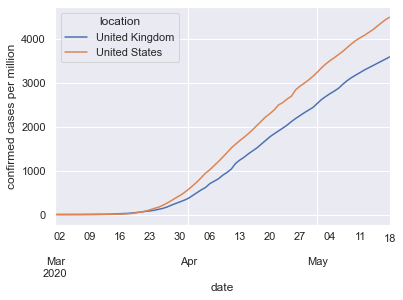

In [9]:
ax = (
    data["total_cases_per_million"]
    .unstack(level="location")[["United Kingdom", "United States"]]
    .plot()
)
ax.set_xlim(pandas.to_datetime(("1 March 2020", "today")))
ax.set_ylabel("confirmed cases per million")

Naive estimate of active cases assuming everybody is sick for exactly 2 weeks

Text(0, 0.5, "'active' cases")

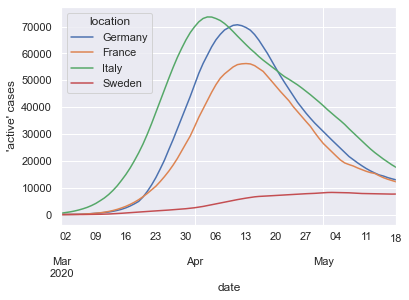

In [10]:
confirmed = data["total_cases"].unstack(level="location")
ax = (
    (confirmed - confirmed.shift(14))[
        ["Germany", "France", "Italy", "Sweden"]
    ]
    .rolling(window=7)
    .mean()
    .plot()
)
ax.set_xlim(pandas.to_datetime(("1 March 2020", "today")))
ax.set_ylabel("'active' cases")

Text(0, 0.5, "'active' cases")

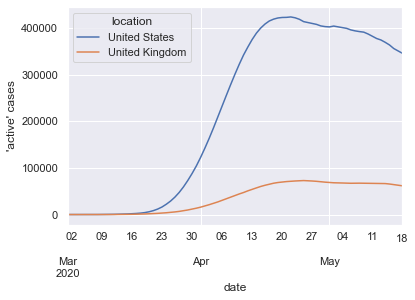

In [11]:
ax = (
    (confirmed - confirmed.shift(14))[
        ["United States", "United Kingdom"]
    ]
    .rolling(window=7)
    .mean()
    .plot()
)
ax.set_xlim(pandas.to_datetime(("1 March 2020", "today")))
ax.set_ylabel("'active' cases")

Active cases per population

Text(0, 0.5, "'active' cases per million")

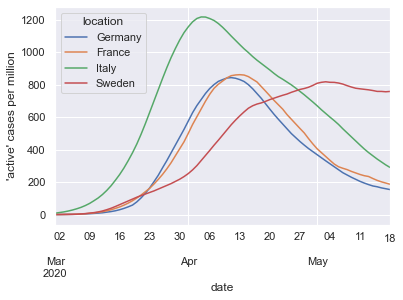

In [12]:
confirmedpm = data["total_cases_per_million"].unstack(
    level="location"
)
ax = (
    (confirmedpm - confirmedpm.shift(14))[
        ["Germany", "France", "Italy", "Sweden"]
    ]
    .rolling(window=7)
    .mean()
    .plot()
)
ax.set_xlim(
    pandas.to_datetime(("1 March 2020", "today"))
)
ax.set_ylabel("'active' cases per million")

Text(0, 0.5, "'active' cases per million")

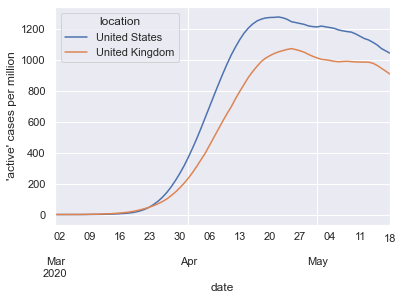

In [13]:
ax = (
    (confirmedpm - confirmedpm.shift(14))[
        ["United States", "United Kingdom"]
    ]
    .rolling(window=7)
    .mean()
    .plot()
)
ax.set_xlim(pandas.to_datetime(("1 March 2020", "today")))
ax.set_ylabel("'active' cases per million")

To estimate the reproduction rate, we use $R(t)\approx c(t)/c(t - 6)$. From (https://www.medrxiv.org/content/10.1101/2020.04.22.20076430v1.full.pdf)

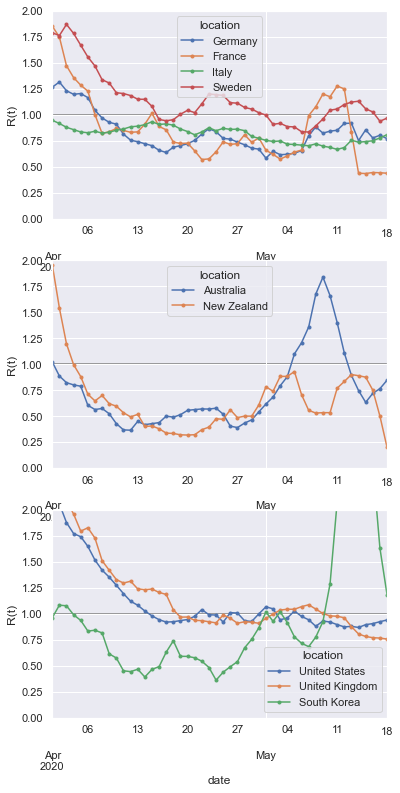

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(6, 13))
R = c / c.shift(6)
R[["Germany", "France", "Italy", "Sweden"]].plot(
    ax=axs[0], style=".-"
)
R[["Australia", "New Zealand"]].plot(ax=axs[1], style=".-")
R[["United States", "United Kingdom", "South Korea"]].plot(
    ax=axs[2], style=".-"
)
for ax in axs:
    ax.set_xlim(pandas.to_datetime(("1 April 2020", "today")))
    ax.set_ylim(0, 2)
    ax.set_ylabel("R(t)")
    ax.axhline(1, c="grey", zorder=0)

In [15]:
newdeaths = data['new_deaths'].unstack(level='location')
newdeaths.fillna("")

location,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Western Sahara,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,0,,0,,,,,,0,,...,,,,,0,,0.0,,,
2020-01-01,0,,0,,,,,,0,,...,,,,,0,,0.0,,,
2020-01-02,0,,0,,,,,,0,,...,,,,,0,,0.0,,,
2020-01-03,0,,0,,,,,,0,,...,,,,,0,,0.0,,,
2020-01-04,0,,0,,,,,,0,,...,,,,,0,,0.0,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,3,0,7,1,0,0,0,10,1,0,...,0,1,0,0,0,0,5187.0,1,0,0
2020-05-15,6,0,7,0,0,0,0,24,1,0,...,0,0,0,0,0,0,5370.0,1,0,0
2020-05-16,32,0,7,0,0,0,0,3,3,0,...,0,0,0,0,0,0,5145.0,2,0,0


Daily new deaths for a number of countries

Text(0, 0.5, 'daily new deaths')

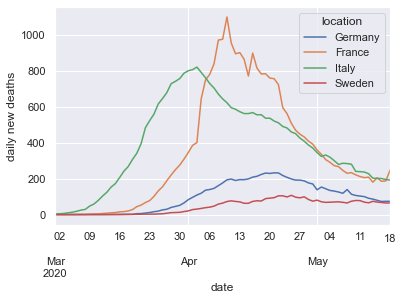

In [16]:
newdeaths[["Germany", "France", "Italy", "Sweden"]].rolling(
    window=7
).mean().plot(
    xlim=(pandas.to_datetime(("1 Mar 2020", "today")))
).set_ylabel(
    "daily new deaths"
)

Text(0, 0.5, 'daily new deaths')

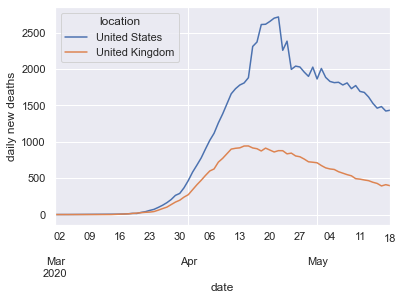

In [17]:
newdeaths[["United States", "United Kingdom"]].rolling(
    window=7
).mean().plot(
    xlim=(pandas.to_datetime(("1 Mar 2020", "today")))
).set_ylabel(
    "daily new deaths"
)

Daily new deaths per population

Text(0, 0.5, 'daily new deaths per million')

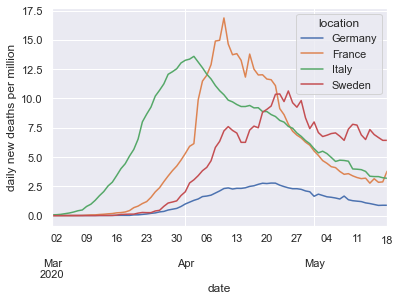

In [18]:
data['new_deaths_per_million'].unstack(level='location')[
    ["Germany", "France", "Italy", "Sweden"]
].rolling(window=7).mean().plot(
    xlim=(pandas.to_datetime(("1 Mar 2020", "today")))
).set_ylabel(
    "daily new deaths per million"
)

Text(0, 0.5, 'daily new deaths per million')

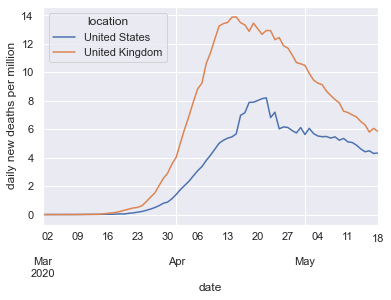

In [19]:
data["new_deaths_per_million"].unstack(level="location")[
    ["United States", "United Kingdom"]
].rolling(window=7).mean().plot(
    xlim=(pandas.to_datetime(("1 Mar 2020", "today")))
).set_ylabel(
    "daily new deaths per million"
)

Total deaths per population up to now

Text(0, 0.5, 'total deaths per million')

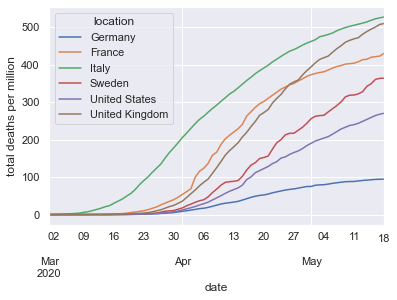

In [20]:
ax = (
    data["total_deaths_per_million"]
    .unstack(level="location")[
        [
            "Germany",
            "France",
            "Italy",
            "Sweden",
            "United States",
            "United Kingdom",
        ]
    ]
    .plot(xlim=(pandas.to_datetime(("1 Mar 2020", "today"))))
)
ax.set_ylabel("total deaths per million")

To calculate the case fatality rate (CFR) one would need the typical delay between confirmation and death which is not easily available. Here I consider that in the last few weeks, there is no good reason for the CFR to vary much and I adjust the delay to this effect. 

There seems to be a huge variation in the delay and in the CFR between countries. Part of it can definitely attributed to different counting and reporting strategies but some things are still puzzling. The new cases and the reaction to measures are almost identical between France and Germany. This would indicate very similar reporting practices. Yet France has four times the CFR of Germany. On the other hand Belgium and the UK seem to handle the crisis very differently, yet have exactly the same CFR.

Also the extremely low CFR of Iceland is probably due to the almost completey screening. However, I doubt Germany has seven times as many cases as reported because the model at ?? seems to work pretty well with an underreporting factor of two. 

The US is actually not doing as badly as it may seem and the west has a hard time beating China's CFR.

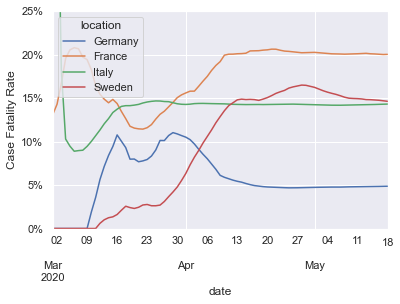

In [21]:
ax = (
    (newdeaths.cumsum() / newcases.shift(14).cumsum())[["Germany"]]
    .rolling(window=7)
    .mean()
    .plot()
)
(newdeaths.cumsum() / newcases.shift(7).cumsum())[["France"]].rolling(
    window=7
).mean().plot(ax=ax)
(newdeaths.cumsum() / newcases.shift(4).cumsum())[["Italy"]].rolling(
    window=7
).mean().plot(ax=ax)
(newdeaths.cumsum() / newcases.shift(8).cumsum())[["Sweden"]].rolling(
    window=7
).mean().plot(ax=ax)
ax.set_xlim(pandas.to_datetime(("1 Mar 2020", "today")))
ax.set_ylim(0, 0.25)
ax.set_ylabel("Case Fatality Rate")
ax.yaxis.set_major_formatter(PercentFormatter(1, 0))

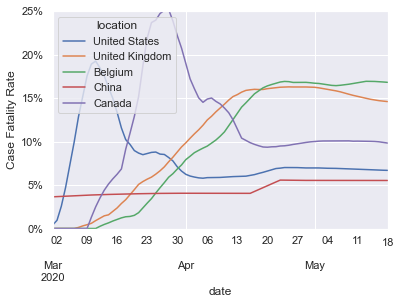

In [22]:
ax = (
    (newdeaths.cumsum() / newcases.shift(6).cumsum())[
        ["United States"]
    ]
    .rolling(window=7)
    .mean()
    .plot()
)
(newdeaths.cumsum() / newcases.shift(1).cumsum())[
    ["United Kingdom"]
].rolling(window=7).mean().plot(ax=ax)
(newdeaths.cumsum() / newcases.shift(4).cumsum())[
    ["Belgium"]
].rolling(window=7).mean().plot(ax=ax)
(newdeaths.cumsum() / newcases.shift(6).cumsum())[["China"]].rolling(
    window=7
).mean().plot(ax=ax)
(newdeaths.cumsum() / newcases.shift(13).cumsum())[
    ["Canada"]
].rolling(window=7).mean().plot(ax=ax)
ax.set_xlim(pandas.to_datetime(("1 March 2020", "today")))
ax.set_ylim(0, 0.25)
ax.set_ylabel("Case Fatality Rate")
ax.yaxis.set_major_formatter(PercentFormatter(1, 0))

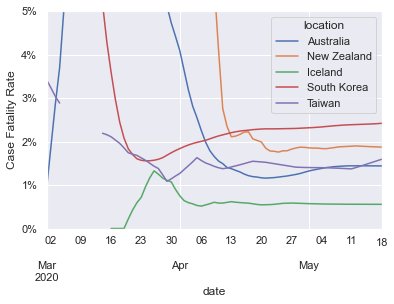

In [23]:
ax = (
    (newdeaths.cumsum() / newcases.shift(12).cumsum())[["Australia"]]
    .rolling(window=7)
    .mean()
    .plot()
)
(newdeaths.cumsum() / newcases.shift(18).cumsum())[
    ["New Zealand"]
].rolling(window=7).mean().plot(ax=ax)
(newdeaths.cumsum() / newcases.shift(10).cumsum())[
    ["Iceland"]
].rolling(window=7).mean().plot(ax=ax)
(newdeaths.cumsum() / newcases.shift(14).cumsum())[
    ["South Korea"]
].rolling(window=7).mean().plot(ax=ax)
(newdeaths.cumsum() / newcases.shift(2).cumsum())[["Taiwan"]].rolling(
    window=7
).mean().plot(ax=ax)
ax.set_xlim(pandas.to_datetime(("1 Mar 2020", "today")))
ax.set_ylim(0, 0.05)
ax.set_ylabel("Case Fatality Rate")
ax.yaxis.set_major_formatter(PercentFormatter(1, 0))

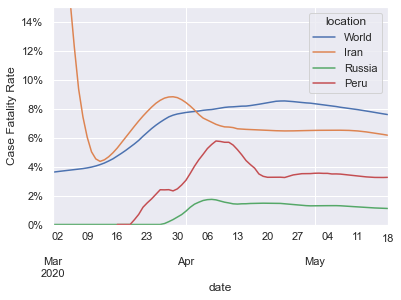

In [24]:
ax = (
    (newdeaths.cumsum() / newcases.shift(5).cumsum())[["World"]]
    .rolling(window=7)
    .mean()
    .plot()
)
(newdeaths.cumsum() / newcases.shift(2).cumsum())[["Iran"]].rolling(
    window=7
).mean().plot(ax=ax)
(newdeaths.cumsum() / newcases.shift(4).cumsum())[["Russia"]].rolling(
    window=7
).mean().plot(ax=ax)
(newdeaths.cumsum() / newcases.shift(3).cumsum())[["Peru"]].rolling(
    window=7
).mean().plot(ax=ax)
ax.set_xlim(pandas.to_datetime(("1 Mar 2020", "today")))
ax.set_ylim(0, 0.15)
ax.set_ylabel("Case Fatality Rate")
ax.yaxis.set_major_formatter(PercentFormatter(1, 0))

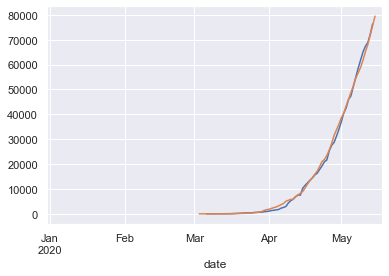

In [25]:
ax = newcases['Peru'][:-4].cumsum().plot()
(30*newdeaths['Peru'].shift(-3).cumsum()).plot(ax=ax)

German events and german events delayed by 12 days

In [26]:
events = {
    "Germany": ["2020 Mar 8", "2020 Mar 13", "2020 Mar 22"],
    "France": ["2020 Mar 13", "2020 Mar 16"],
    "Italy": ["2020 Feb 22", "2020 Mar 4", "2020 Mar 11"],
    "Spain": ["2020 Mar 14", "2020 Mar 29"],
}

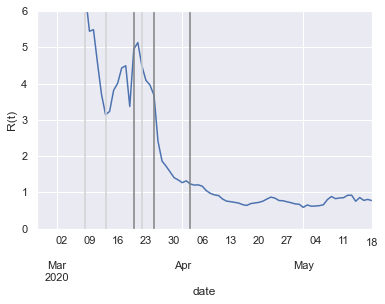

In [27]:
ax = R["Germany"].plot(
    xlim=pandas.to_datetime(("25 Feb 2020", "today")), ylim=(0, 6)
)
ax.set_ylabel("R(t)")
for ev in pandas.to_datetime(events["Germany"]):
    ax.axvline(ev, c="lightgrey")
    ax.axvline(ev + pandas.Timedelta("12 days"), c="grey")

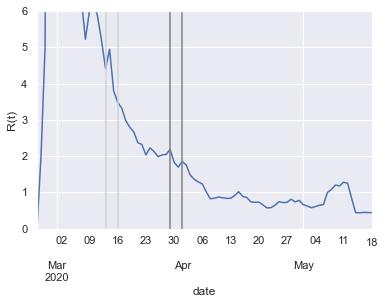

In [28]:
ax = R["France"].plot(
    xlim=pandas.to_datetime(("25 Feb 2020", "today")), ylim=(0, 6)
)
ax.set_ylabel("R(t)")
for ev in pandas.to_datetime(events["France"]):
    ax.axvline(ev, c="lightgrey")
    ax.axvline(ev + pandas.Timedelta("16 days"), c="grey")

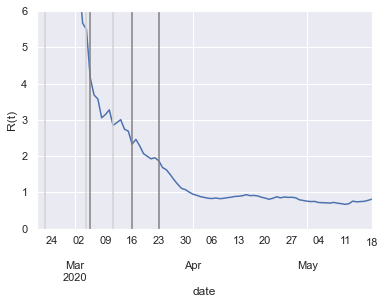

In [29]:
ax = R["Italy"].plot(
    xlim=pandas.to_datetime(("20 Feb 2020", "today")), ylim=(0, 6)
)
ax.set_ylabel("R(t)")
for ev in pandas.to_datetime(events["Italy"]):
    ax.axvline(ev, c="lightgrey")
    ax.axvline(ev + pandas.Timedelta("12 days"), c="grey")

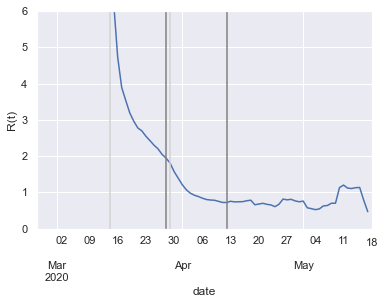

In [30]:
ax = R["Spain"].plot(
    xlim=pandas.to_datetime(("25 Feb 2020", "today")), ylim=(0, 6)
)
ax.set_ylabel("R(t)")
for ev in pandas.to_datetime(events["Spain"]):
    ax.axvline(ev, c="lightgrey")
    ax.axvline(ev + pandas.Timedelta("14 days"), c="grey")

Countries with a mean R (averaged over the last 30 days) below 0.8. 

In [31]:
highlight = set(
    [
        "Germany",
        "France",
        "World",
        "Japan",
        "Spain",
        "Venezuela",
        "Sweden",
        "United States",
        "United Kingdom",
        "Turkey",
        "Russia",
        "China",
        "Taiwan",
    ]
)

[None, None, None, None]

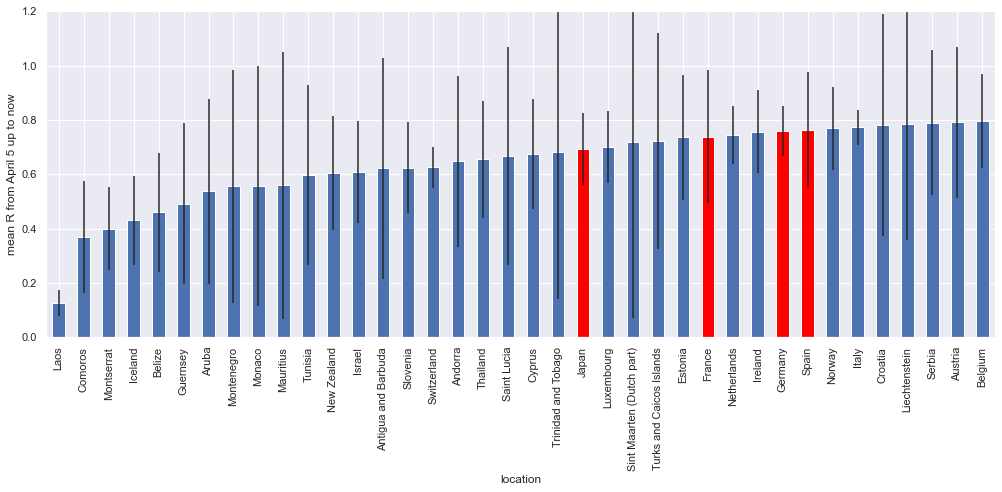

In [32]:
pandas.set_option("use_inf_as_na", True)
Rrecent = R[
    (pandas.to_datetime("today") - pandas.to_timedelta("30 days")) :
]
Rmean = Rrecent[Rrecent > 0.0].mean().dropna()
Rerr = Rrecent.std().dropna()

low = Rmean[(Rmean <= 0.8) & (Rerr < 0.9)].sort_values()
ax = low.plot.bar(yerr=Rerr, figsize=(17, 6), ylim=(0, 1.2))
ax.set_ylabel("mean R from April 5 up to now")
[
    ax.patches[low.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(low.index.values))
]

Countrys with a mean R around 1

[None, None, None, None, None, None]

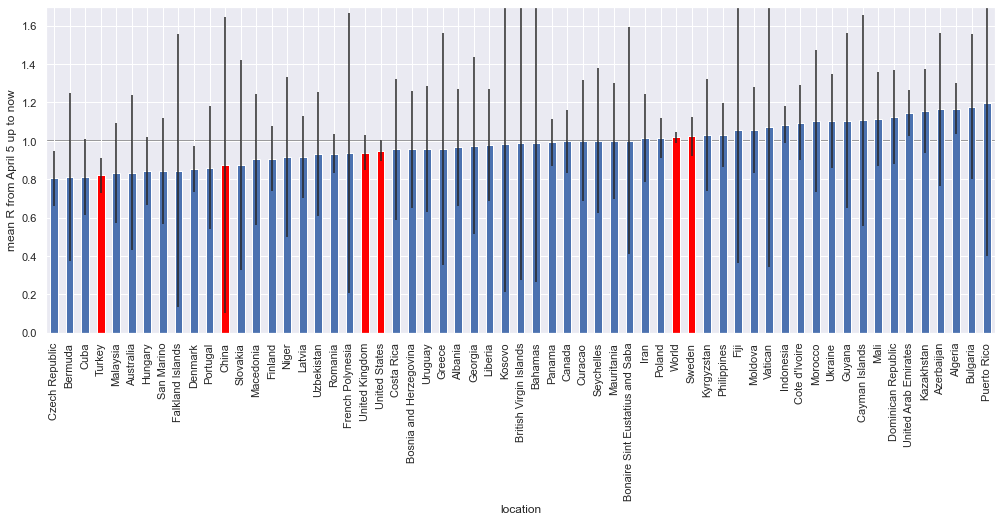

In [33]:
middle = Rmean[
    (Rmean > 0.8) & (Rmean <= 1.2) & (Rerr < 0.8)
].sort_values()
ax = middle.plot.bar(yerr=Rerr, figsize=(17, 6), ylim=(0, 1.7))
ax.set_ylabel("mean R from April 5 up to now")
ax.axhline(1, c="grey", zorder=0)
[
    ax.patches[middle.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(middle.index.values))
]

Countrys with a higher mean R but still below 2

[None, None]

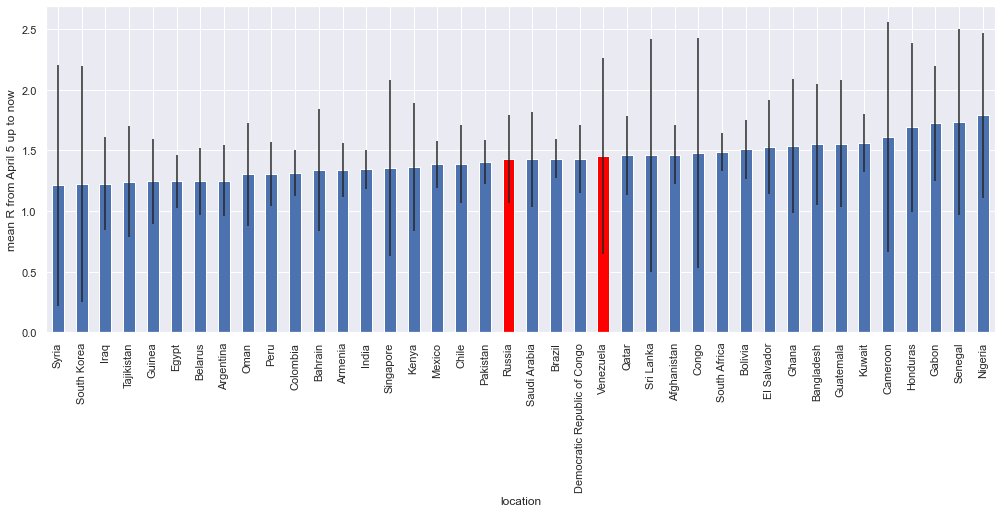

In [34]:
higher = Rmean[
    (Rmean > 1.2) & (Rmean <= 2) & (Rerr < 1)
].sort_values()
ax = higher.plot.bar(yerr=Rerr, figsize=(17, 6))
ax.set_ylabel("mean R from April 5 up to now")
[
    ax.patches[higher.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(higher.index.values))
]

Pretty miserable countries with a R above 2

[]

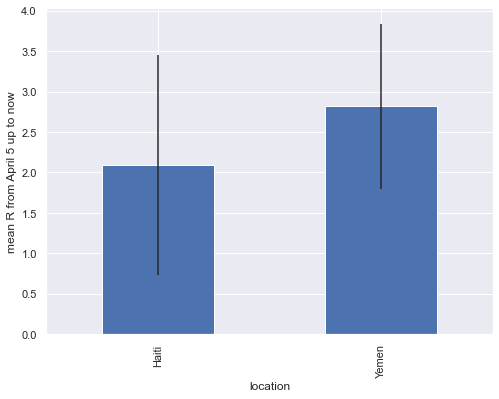

In [35]:
high = Rmean[(Rmean > 2) & (Rerr < 1.5)].sort_values()
ax = high.plot.bar(yerr=Rerr, figsize=(8, 6))
ax.set_ylabel("mean R from April 5 up to now")
[
    ax.patches[high.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(high.index.values))
]

Doubling time for countries with more than 200 cases. Start with the nice ones with 5 weeks or more

Text(0, 0.5, 'doubling time for cases in days')

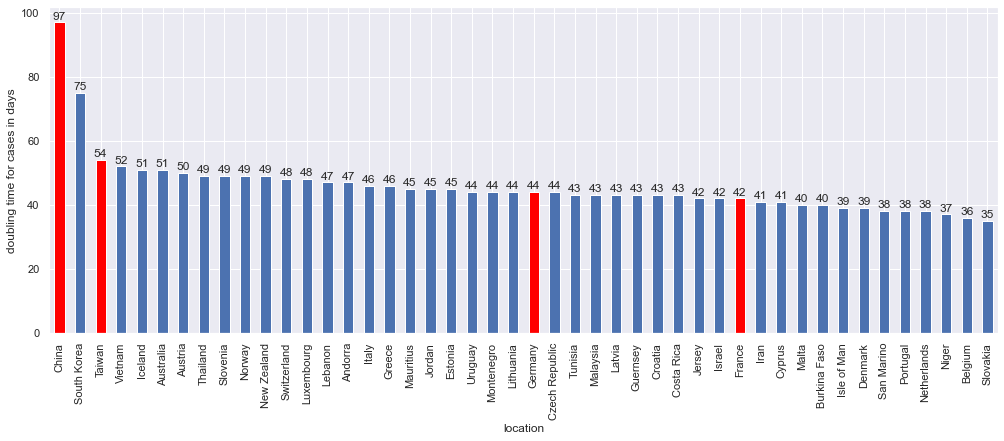

In [36]:
total = data["total_cases"].unstack(level="location")
dbltime = (
    total.index[-1] - (total - total.iloc[-1] / 2).abs().idxmin()
).sort_values(ascending=False, kind="mergesort")
tslice = dbltime[
    (dbltime >= pandas.Timedelta("35 days")) & (total.iloc[-1] > 200)
].dt.days
ax = tslice.plot.bar(figsize=(17, 6))
[
    ax.patches[tslice.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(tslice.index.values))
]
[ax.text(i, v + 1, str(v), ha="center") for i, v in enumerate(tslice)]
ax.set_ylabel("doubling time for cases in days")

Text(0, 0.5, 'doubling time for cases in days')

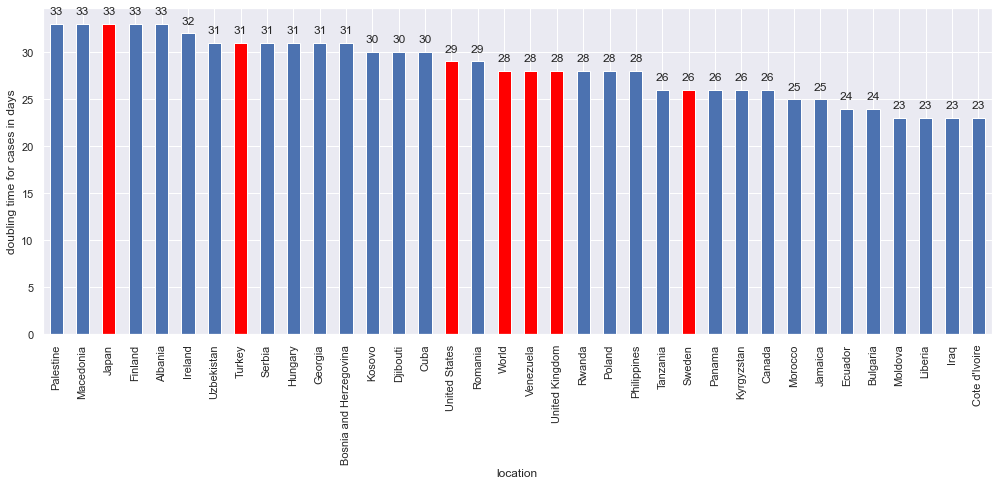

In [37]:
tslice = dbltime[
    (dbltime < pandas.Timedelta("35 days"))
    & (dbltime >= pandas.Timedelta("23 days"))
    & (total.iloc[-1] > 200)
].dt.days
ax = tslice.plot.bar(figsize=(17, 6))
[
    ax.patches[tslice.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(tslice.index.values))
]
[ax.text(i, v + 1, str(v), ha="center") for i, v in enumerate(tslice)]
ax.set_ylabel("doubling time for cases in days")

Text(0, 0.5, 'doubling time for cases in days')

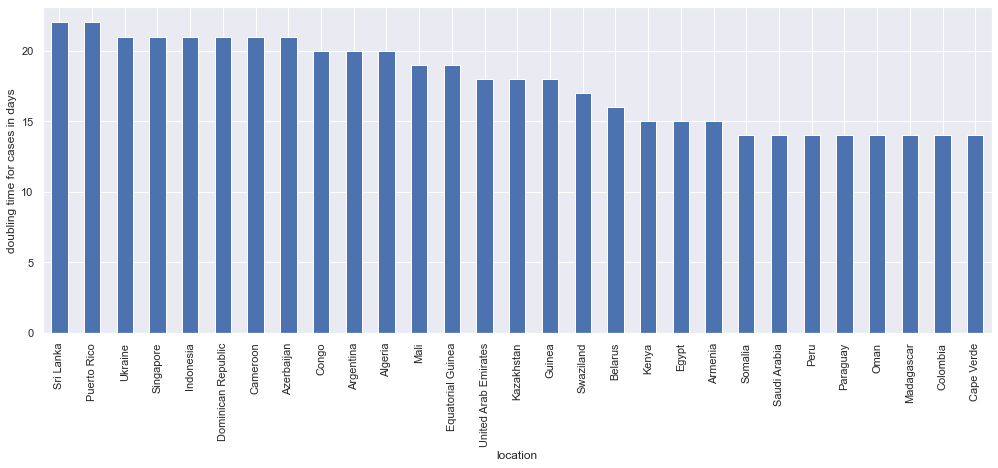

In [38]:
tslice = dbltime[
    (dbltime < pandas.Timedelta("23 days"))
    & (dbltime >= pandas.Timedelta("14 days"))
    & (total.iloc[-1] > 200)
].dt.days
ax = tslice.plot.bar(figsize=(17, 6))
[
    ax.patches[tslice.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(tslice.index.values))
]
ax.set_ylabel("doubling time for cases in days")

Text(0, 0.5, 'doubling time for cases in days')

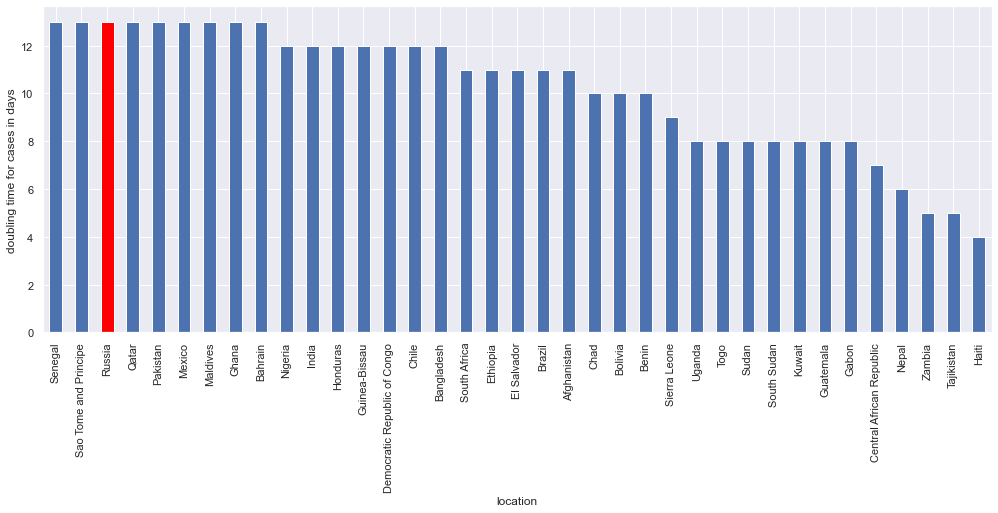

In [39]:
tslice = dbltime[
    (dbltime < pandas.Timedelta("14 days")) & (total.iloc[-1] > 200)
].dt.days
ax = tslice.plot.bar(figsize=(17, 6))
[
    ax.patches[tslice.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(tslice.index.values))
]
ax.set_ylabel("doubling time for cases in days")

Text(0, 0.5, 'doubling time for deaths in days')

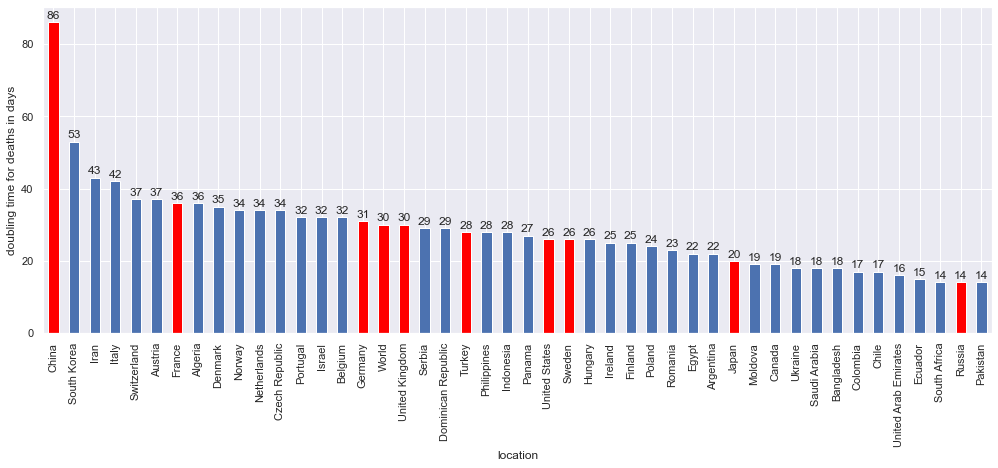

In [40]:
total = data['total_deaths'].unstack(level='location')
dbltime = (
    total.index[-1] - (total - total.iloc[-1] / 2).abs().idxmin()
).sort_values(ascending=False, kind="mergesort")
tslice = dbltime[
    (dbltime >= pandas.Timedelta("14 days")) & (total.iloc[-1] > 200)
].dt.days
ax = tslice.plot.bar(figsize=(17, 6))
[
    ax.patches[tslice.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(tslice.index.values))
]
[ax.text(i, v + 1, str(v), ha="center") for i, v in enumerate(tslice)]
ax.set_ylabel("doubling time for deaths in days")

Text(0, 0.5, 'doubling time for deaths in days')

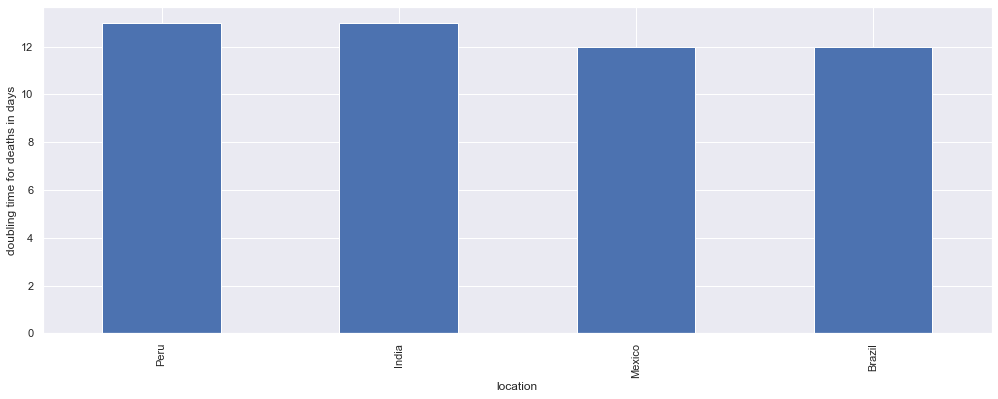

In [41]:
tslice = dbltime[
    (dbltime < pandas.Timedelta("14 days")) & (total.iloc[-1] > 200)
].dt.days
ax = tslice.plot.bar(figsize=(17, 6))
[
    ax.patches[tslice.index.get_loc(emph)].set_facecolor("red")
    for emph in (highlight & set(tslice.index.values))
]
ax.set_ylabel("doubling time for deaths in days")

In [42]:
%load_ext blackcellmagic

location
Vatican                            8.090000e+02
Falkland Islands                   3.483000e+03
Montserrat                         4.999000e+03
Anguilla                           1.500200e+04
Bonaire Sint Eustatius and Saba    2.622100e+04
                                       ...     
World                              7.794799e+09
Guernsey                                    NaN
International                               NaN
Jersey                                      NaN
Kosovo                                      NaN
Name: 2020-05-18 00:00:00, Length: 212, dtype: float64

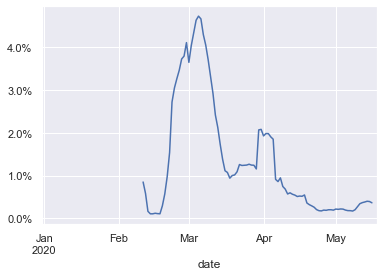

In [43]:
newdata = pandas.read_csv(
    "https://covid.ourworldindata.org/data/owid-covid-data.csv",
    parse_dates=True,
    index_col=["location", "date"],
)
newdata['new_cases'].unstack(level='location')
positives = (newdata['new_cases']/newdata['new_tests']).unstack(level='location')
positives = positives.loc[:, (~positives.isna()).any()]
ax = positives['South Korea'].rolling(window=7).mean().plot()
ax.yaxis.set_major_formatter(PercentFormatter(1, 1))
newdata['population'].unstack('location').ffill().iloc[-1].sort_values()